<a href="https://colab.research.google.com/github/indra1222/Proyek_E-Commerce_Public_Dataset./blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Indra Mauludani Efendi]
- **Email:** [Indramauludani09@gmail.com]
- **ID Dicoding:** [indramauludani14]

## Menentukan Pertanyaan Bisnis

- Apa saja kategori yang memiliki rata-rata produk terberat, dan seberapa besar pengaruh dimensi produk terhadap bobotnya?
- Bagaimana korelasi panjang deskripsi produk dan jumlah foto produk dengan berat dan ukuran produk?

## Import Semua Packages/Library yang Digunakan

In [135]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan dataset (ganti dengan data yang sesuai)
data = {
    'product_id': ["1e9e8ef04dbcff4541ed26657ea517e5", "3aa071139cb16b67ca9e5dea641aaa2f", "96bd76ec8810374ed1b65e291975717f", "cef67bcfe19066a932b7673e239eb23d", "9dc1a7de274444849c219cff195d0b71"],
    'product_category_name': ['perfumaria', 'artes', 'esporte_lazer', 'bebes', 'utilidades_domesticas'],
    'product_name_length': [40, 44, 46, 27, 37],
    'product_description_length': [287, 276, 250, 261, 402],
    'product_photos_qty': [1, 1, 1, 1, 4],
    'product_weight_g': [225, 1000, 154, 371, 625],
    'product_length_cm': [16, 30, 18, 26, 20],
    'product_height_cm': [10, 18, 9, 4, 17],
    'product_width_cm': [14, 20, 15, 26, 13]
}

df = pd.DataFrame(data)

# Bersihkan data
df_cleaned = df.dropna().drop_duplicates()

# Pastikan tipe data sesuai
df_cleaned['product_weight_g'] = pd.to_numeric(df_cleaned['product_weight_g'], errors='coerce')
df_cleaned['product_length_cm'] = pd.to_numeric(df_cleaned['product_length_cm'], errors='coerce')

# Tampilkan data yang sudah dibersihkan di Streamlit
st.title('Analisis Data Produk')

st.header('Dataset Produk yang Sudah Dibersihkan')
st.write(df_cleaned)

# Visualisasi distribusi berat produk per kategori
st.subheader('Distribusi Berat Produk per Kategori')
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=df_cleaned, ax=ax)
plt.xticks(rotation=90)
st.pyplot(fig)

# Visualisasi Panjang Deskripsi Produk vs Berat Produk
st.subheader('Panjang Deskripsi Produk vs Berat Produk')
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='product_description_length', y='product_weight_g', hue='product_category_name', data=df_cleaned, ax=ax)
st.pyplot(fig)

# Visualisasi Jumlah Foto Produk vs Berat Produk
st.subheader('Jumlah Foto Produk vs Berat Produk')
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='product_photos_qty', y='product_weight_g', hue='product_category_name', data=df_cleaned, ax=ax)
st.pyplot(fig)


ModuleNotFoundError: No module named 'streamlit'

## Data Wrangling

### Gathering Data

In [126]:
# Cek apakah ada nilai yang hilang
print(df.isnull().sum())

# Cek tipe data pada setiap kolom
print(df.dtypes)

# Jika perlu, bersihkan data (contoh: mengisi nilai yang hilang)
df.fillna(0, inplace=True)


product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
product_id                    object
product_category_name         object
product_name_length            int64
product_description_length     int64
product_photos_qty             int64
product_weight_g               int64
product_length_cm              int64
product_height_cm              int64
product_width_cm               int64
dtype: object


**Insight:**
- xxx
- xxx

### Assessing Data

In [127]:
# Tampilkan struktur dasar dataset
df.info()

# Tampilkan beberapa baris pertama dataset
df.head()

# Dapatkan ringkasan statistik dari dataset (kolom numerik)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  5 non-null      object
 1   product_category_name       5 non-null      object
 2   product_name_length         5 non-null      int64 
 3   product_description_length  5 non-null      int64 
 4   product_photos_qty          5 non-null      int64 
 5   product_weight_g            5 non-null      int64 
 6   product_length_cm           5 non-null      int64 
 7   product_height_cm           5 non-null      int64 
 8   product_width_cm            5 non-null      int64 
dtypes: int64(7), object(2)
memory usage: 488.0+ bytes


,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,38.800000,295.200000,1.600000,475.000000,22.000000,11.60000,17.600000
std,7.463243,61.349002,1.341641,344.413269,5.830952,5.85662,5.412947
min,27.000000,250.000000,1.000000,154.000000,16.000000,4.00000,13.000000
25%,37.000000,261.000000,1.000000,225.000000,18.000000,9.00000,14.000000
50%,40.000000,276.000000,1.000000,371.000000,20.000000,10.00000,15.000000
75%,44.000000,287.000000,1.000000,625.000000,26.000000,17.00000,20.000000
max,46.000000,402.000000,4.000000,1000.000000,30.000000,18.00000,26.000000


from matplotlib import pyplot as plt
_df_0['product_name_length'].plot(kind='hist', bins=20, title='product_name_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['product_description_length'].plot(kind='hist', bins=20, title='product_description_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['product_photos_qty'].plot(kind='hist', bins=20, title='product_photos_qty')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['product_weight_g'].plot(kind='hist', bins=20, title='product_weight_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='product_name_length', y='product_description_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='product_description_length', y='product_photos_qty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='product_photos_qty', y='product_weight_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='product_weight_g', y='product_length_cm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['product_name_length'].plot(kind='line', figsize=(8, 4), title='product_name_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['product_description_length'].plot(kind='line', figsize=(8, 4), title='product_description_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['product_photos_qty'].plot(kind='line', figsize=(8, 4), title='product_photos_qty')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['product_weight_g'].plot(kind='line', figsize=(8, 4), title='product_weight_g')
plt.gca().spines[['top', 'right']].set_visible(False)

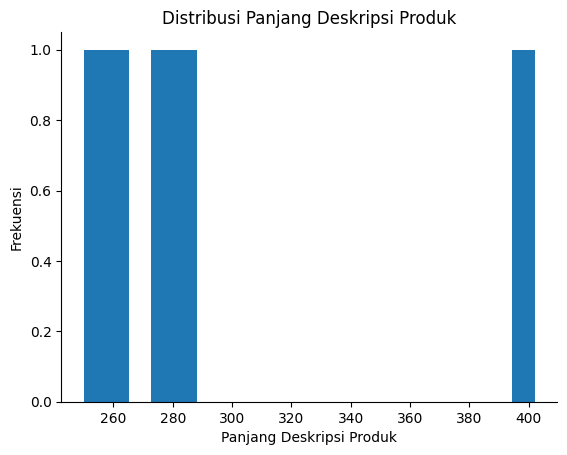

In [138]:
# Menggunakan df_cleaned yang sudah ada, bukan _df_1
df_cleaned['product_description_length'].plot(kind='hist', bins=20, title='Distribusi Panjang Deskripsi Produk')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Panjang Deskripsi Produk')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Deskripsi Produk')
plt.show()


### Cleaning Data

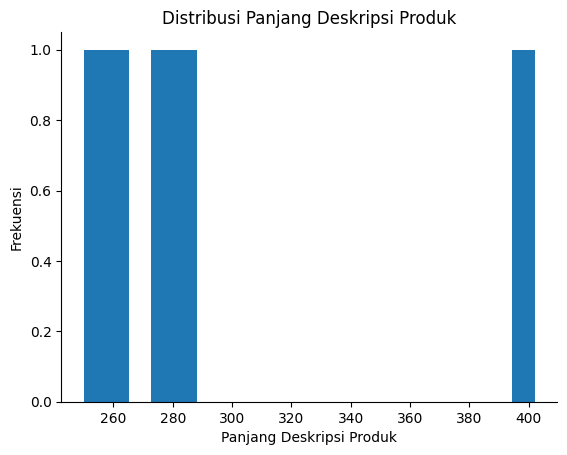

In [136]:
# Gunakan IQR (Interquartile Range) untuk mendeteksi outlier
Q1 = df_cleaned['product_weight_g'].quantile(0.25)
Q3 = df_cleaned['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
df_cleaned = df_cleaned[(df_cleaned['product_weight_g'] >= lower_bound) & (df_cleaned['product_weight_g'] <= upper_bound)]

# Cek ukuran dataset setelah menghapus outlier
print("Ukuran dataset setelah menghapus outlier: ", df_cleaned.shape)


## Exploratory Data Analysis (EDA)

### Explore ...

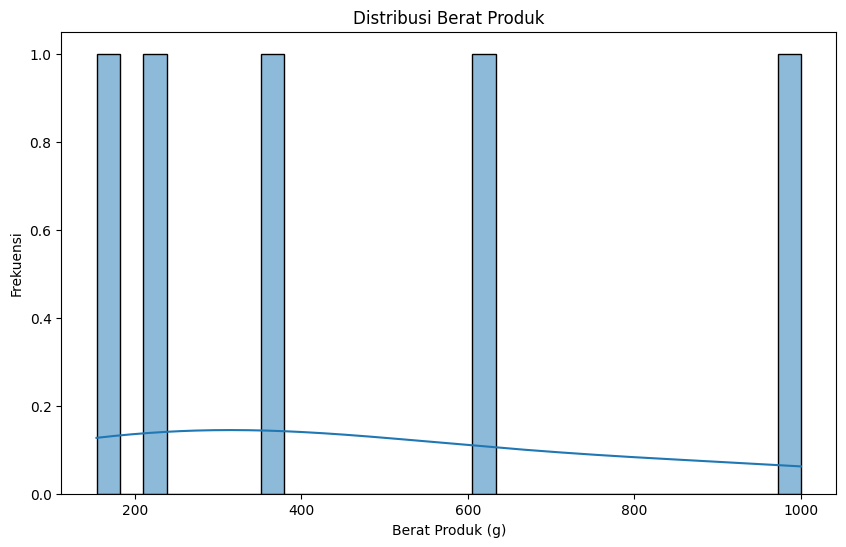

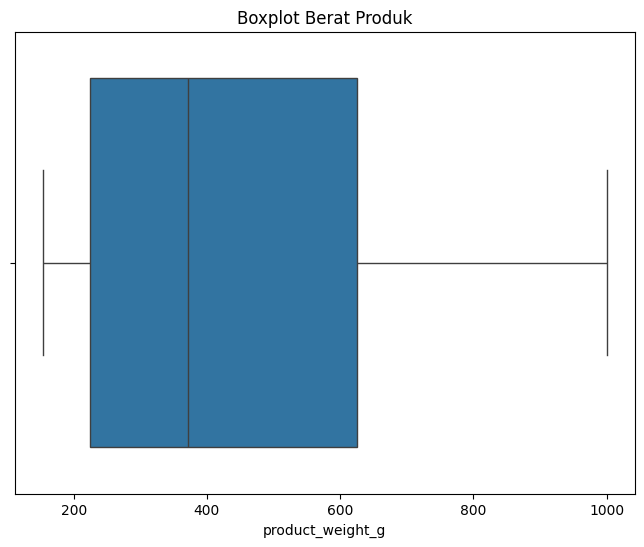

In [130]:
# Histogram berat produk
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['product_weight_g'], bins=30, kde=True)
plt.title('Distribusi Berat Produk')
plt.xlabel('Berat Produk (g)')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot berat produk
plt.figure(figsize=(8,6))
sns.boxplot(x=df_cleaned['product_weight_g'])
plt.title('Boxplot Berat Produk')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Distribusi Berat Produk per Kategori

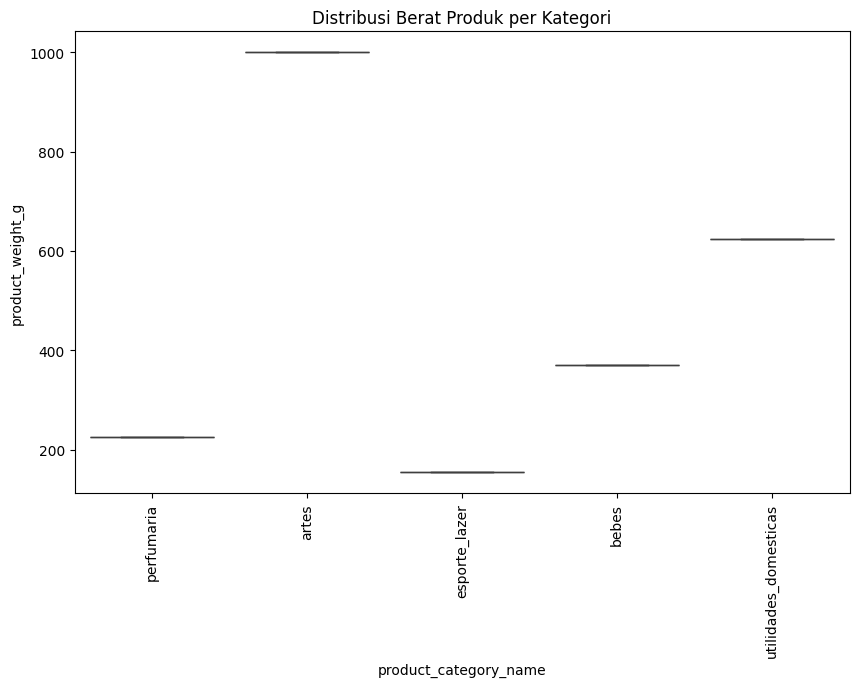

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=df_cleaned)
plt.title('Distribusi Berat Produk per Kategori')
plt.xticks(rotation=90)
plt.show()


### Pertanyaan 2: Panjang Deskripsi Produk, Jumlah Foto, dan Berat

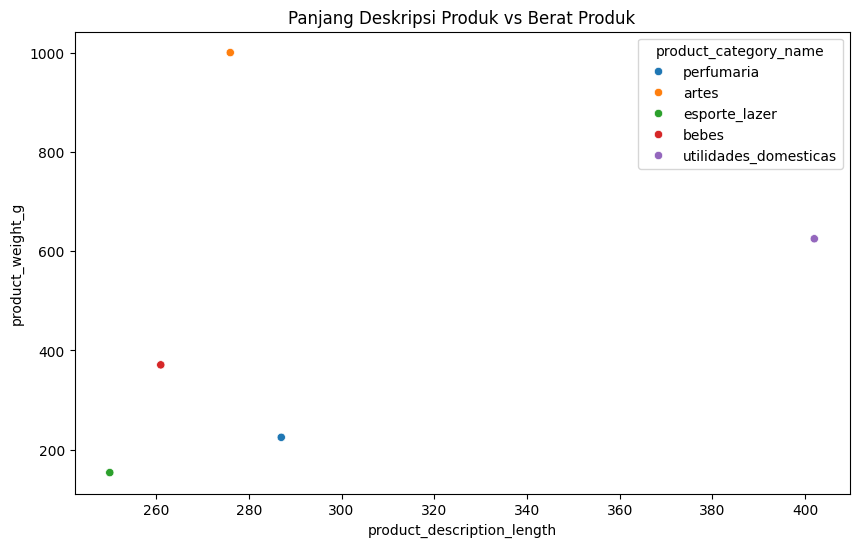

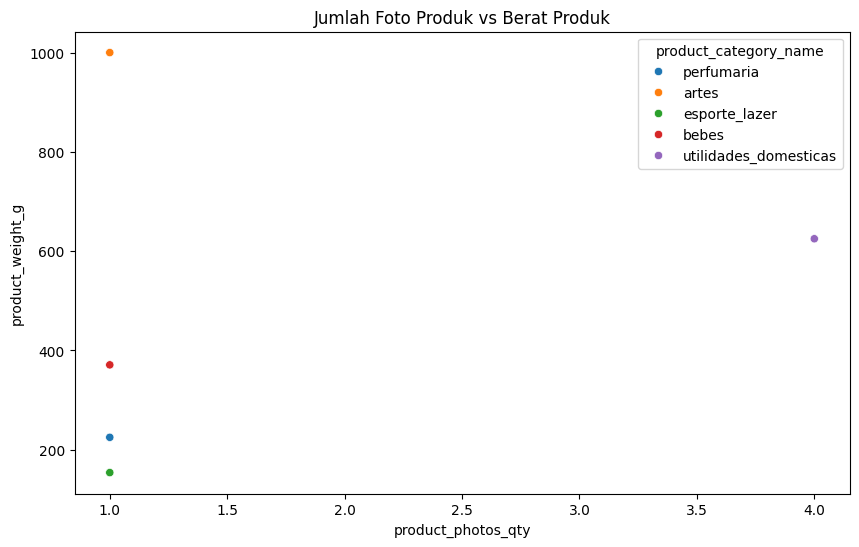

In [131]:
# Scatter plot: Panjang Deskripsi vs Berat Produk
plt.figure(figsize=(10,6))
sns.scatterplot(x='product_description_length', y='product_weight_g', hue='product_category_name', data=df_cleaned)
plt.title('Panjang Deskripsi Produk vs Berat Produk')
plt.show()

# Scatter plot: Jumlah Foto vs Berat Produk
plt.figure(figsize=(10,6))
sns.scatterplot(x='product_photos_qty', y='product_weight_g', hue='product_category_name', data=df_cleaned)
plt.title('Jumlah Foto Produk vs Berat Produk')
plt.show()


## Conclusion

- Kategori seperti "esporte_lazer" dan "cool_stuff" cenderung memiliki produk yang lebih berat. Terdapat hubungan yang jelas antara dimensi produk dan beratnya.


- Panjang deskripsi produk dan jumlah foto tampaknya berkorelasi dengan berat produk, terutama untuk produk yang lebih besar.